In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
import os
import zipfile

In [ ]:
local_zip = '/content/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()


base_dir = '/content/Dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
splitfolders.ratio("/content/dataset",base_dir,ratio=(0.8,0.2))




Copying files: 0 files [00:00, ? files/s]


Copying files: 308 files [00:00, 3074.64 files/s]


Copying files: 703 files [00:00, 3293.26 files/s]


Copying files: 1228 files [00:00, 3707.43 files/s]


Copying files: 1751 files [00:00, 4061.84 files/s]


Copying files: 2241 files [00:00, 4182.13 files/s]


Copying files: 2754 files [00:00, 4421.27 files/s]


Copying files: 3289 files [00:00, 4663.63 files/s]


Copying files: 3828 files [00:00, 4858.94 files/s]


Copying files: 4309 files [00:00, 4743.49 files/s]


Copying files: 5040 files [00:01, 4719.12 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150,150),
        color_mode="rgb",  
        batch_size=10,
        class_mode='binary')

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    fill_mode = 'nearest')

validation_generator = train_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150,150),
        color_mode="rgb",  
        batch_size=10,
        class_mode='binary')

Found 4032 images belonging to 6 classes.
Found 1008 images belonging to 6 classes.


In [ ]:
baseMobnet = MobileNet(input_shape = (150, 150, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

baseMobnet.trainable=False

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
                          baseMobnet,
                          tf.keras.layers.Flatten(),  
                          tf.keras.layers.Dense(512, activation='relu'),
                          tf.keras.layers.Dropout(0.2),
                          tf.keras.layers.Dense(6, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8389120   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3078      
Total params: 11,621,062
Trainable params: 8,392,198
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:

model.compile(optimizer = "RMSprop", loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

hist = model.fit(
      train_generator,
      steps_per_epoch=10, 
      epochs=100,
      validation_data=validation_generator, 
      validation_steps=1,
      verbose=1)

Epoch 1/100
10/10 [==============================] - 5s 316ms/step - loss: 24.8700 - acc: 0.4300 - val_loss: 3.4798 - val_acc: 0.6000
Epoch 2/100
10/10 [==============================] - 2s 242ms/step - loss: 10.7895 - acc: 0.5500 - val_loss: 10.7042 - val_acc: 0.4000
Epoch 3/100
10/10 [==============================] - 2s 245ms/step - loss: 6.0987 - acc: 0.6100 - val_loss: 1.4444 - val_acc: 0.6000
Epoch 4/100
10/10 [==============================] - 2s 248ms/step - loss: 5.1631 - acc: 0.6000 - val_loss: 5.2768 - val_acc: 0.3000
Epoch 5/100
10/10 [==============================] - 2s 242ms/step - loss: 4.0070 - acc: 0.6200 - val_loss: 5.8530 - val_acc: 0.7000
Epoch 6/100
10/10 [==============================] - 2s 246ms/step - loss: 2.3064 - acc: 0.6800 - val_loss: 1.0811 - val_acc: 0.7000
Epoch 7/100
10/10 [==============================] - 2s 250ms/step - loss: 2.2131 - acc: 0.7600 - val_loss: 0.4692 - val_acc: 0.8000
Epoch 8/100
10/10 [==============================] - 3s 253ms/step

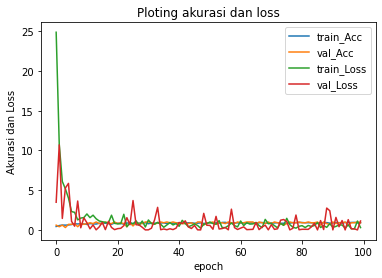

In [ ]:

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Ploting akurasi dan loss')

plt.ylabel('Akurasi dan Loss')
plt.xlabel('epoch')

plt.legend(['train_Acc', 'val_Acc','train_Loss', 'val_Loss'])
plt.show()

Saving test.jpg to test (1).jpg
[[1.9528489e-10 6.0815722e-02 4.3561151e-11 5.2903756e-16 1.0000000e+00
  3.9208177e-12]]


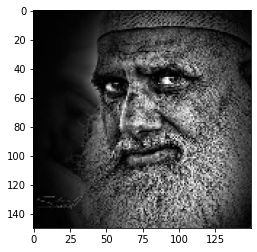

In [ ]:

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150,3),color_mode="rgb")
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)

In [ ]:
export_dir = 'saved_model/1'

tf.saved_model.save(model,export_dir=export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter.optimizations = [optimization]
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

11868272